In [1]:
# ライブラリのロード
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# ジニ不純の関数を定義
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

In [3]:
# エントロピー誤差の関数を定義
def entropy(p):
    return -p*np.log2(p) - (1 - p)*np.log2(1 - p)

In [4]:
# 分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1 - p])

In [5]:
# 確率を表す配列を生成（0から0.99まで0.01刻み）
x = np.arange(0.0, 1.0, 0.01)

In [9]:
# 配列の値を元にエントロピー, 分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

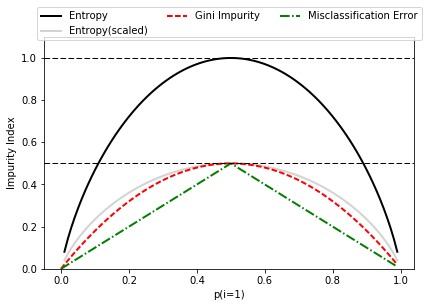

In [12]:
# 図の作成の開始
fig = plt.figure()
ax = plt.subplot(111)

# エントロピー（２種）, ジニ不純度, 分類誤差のそれぞれをループ処理
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                                    ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification Error'],
                                    ['-', '-', '--', '-.'],
                                    ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
# 凡例の設定（中央の上に配置）
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
# 2本の水平の破線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
# 横軸の上限 / 下限を設定
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()